<a href="https://colab.research.google.com/github/isDaisyorDaisy/proejcts/blob/main/Bikes_%26_Cycling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [ ]:
transaction_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
customer_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/KPMG_VI_New_raw_data_update_final.xlsx','NewCustomerList')
customer_demo_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customer_add_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
customer_add_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [ ]:
customer_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.58,0.5800,0.725000,0.616250,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4.0,4,1.703125


In [ ]:
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df = transaction_df.drop(index = transaction_df.index[0], axis = 0)
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [ ]:
transaction_df = transaction_df.replace(" ",np.NaN)
transaction_df = transaction_df.fillna(transaction_df.mean())
for col in transaction_df.columns:
    if transaction_df[col].dtypes == 'object':
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
customer_demo_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
# customer_df.columns = customer_df.iloc[0]
# ###customer_df.drop(labels =0, axis =0)
# customer_df.drop(index= customer_df.index[0],axis = 0, inplace =True)


In [ ]:
customer_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
customer_demo_df = customer_demo_df.replace(' ', np.NaN)
customer_demo_df = customer_demo_df.fillna(customer_demo_df.mean())
customer_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
for col in customer_demo_df:
  if customer_demo_df[col].dtype== 'object':
    customer_demo_df[col] = customer_demo_df[col].fillna(customer_demo_df[col].value_counts().iloc[0])

In [ ]:
customer_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
new_df = transaction_df.merge(customer_demo_df, how = 'inner', left_on = 'customer_id', right_on='customer_id').sort_values(['age'], ascending = True)

In [ ]:
new_df.info()
new_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2263 to 1218
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19997 non-null  object        
 5   order_status                         19997 non-null  object        
 6   brand                                19997 non-null  object        
 7   product_line                         19997 non-null  object        
 8   product_class                        19997 non-null  object        
 9   product_size                         19997 non-null  object        
 10  list_pri

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
2263,9475,52,470,2017-12-21,False,Approved,OHM Cycles,Road,medium,medium,...,Male,22,2001-12-19,18.0,Internal Auditor,Retail,Mass Customer,N,No,1.000000
2712,7389,61,1250,2017-11-25,True,Approved,OHM Cycles,Standard,low,medium,...,Female,42,2001-11-02,18.0,Help Desk Technician,Manufacturing,Mass Customer,N,No,1.000000
19359,16625,40,105,2017-07-31,True,Approved,OHM Cycles,Standard,high,medium,...,Female,25,2001-09-17,18.0,Recruiting Manager,Manufacturing,Mass Customer,N,No,1.000000
19358,14466,4,105,2017-03-28,True,Approved,Giant Bicycles,Standard,high,medium,...,Female,25,2001-09-17,18.0,Recruiting Manager,Manufacturing,Mass Customer,N,No,1.000000
19357,12760,3,105,2017-10-02,False,Approved,Trek Bicycles,Standard,medium,large,...,Female,25,2001-09-17,18.0,Recruiting Manager,Manufacturing,Mass Customer,N,No,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19490,19514,40,582,2017-04-15,False,Approved,OHM Cycles,Standard,high,medium,...,U,21,NaT,120.0,Staff Scientist,IT,Affluent Customer,N,No,10.657041
1348,18297,97,2999,2017-08-08,False,Approved,Solex,Standard,medium,large,...,U,28,NaT,120.0,Business Systems Development Analyst,IT,Affluent Customer,N,Yes,10.657041
1347,15601,4,2999,2017-08-27,True,Approved,Giant Bicycles,Standard,high,medium,...,U,28,NaT,120.0,Business Systems Development Analyst,IT,Affluent Customer,N,Yes,10.657041
11670,4053,29,3312,2017-08-23,True,Approved,WeareA2B,Standard,medium,medium,...,U,49,NaT,120.0,Administrative Officer,IT,High Net Worth,N,No,10.657041


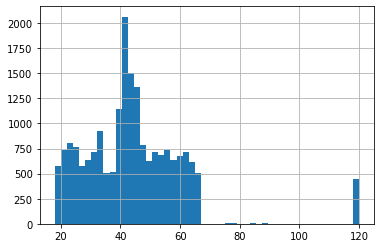

In [ ]:
new_df['age'].hist(bins = 50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


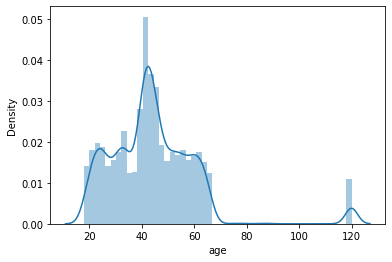

In [ ]:
sns.distplot(new_df['age'], bins =50, hist =True, kde = True, fit = None)

In [ ]:
new_df[['list_price', 'standard_cost']]

,list_price,standard_cost
2263,1280.28,829.51
2712,71.16,56.93
19359,1458.17,874.90
19358,1129.13,677.48
19357,2091.47,388.92
...,...,...
19490,1458.17,874.90
1348,202.62,151.96
1347,1129.13,677.48
11670,1065.03,230.09


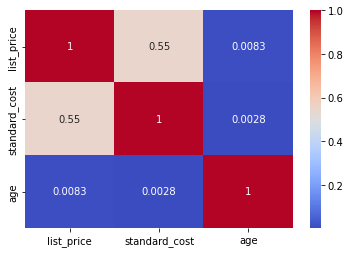

In [ ]:
sns.heatmap(new_df[['list_price', 'standard_cost', 'age']].corr(), annot = True, cmap = 'coolwarm')

In [ ]:
def get_month(x):
  return dt.datetime(x.year,x.month, 1)

new_df['transaction_month']= new_df['transaction_date'].apply(get_month)

new_df['cohort_month'] = new_df.groupby(['customer_id'])['transaction_month'].transform(np.min)

print(type(new_df['cohort_month']))

def date_changed(df, col):
  year = df[col].dt.year
  month = df[col].dt.month
  day = df[col]
  return year, month, day

transaction_year, transaction_month, _=date_changed(new_df, 'transaction_month')

cohort_year, cohort_month, _ = date_changed(new_df, 'cohort_month')
#transaction_year

#new_df.head()#


<class 'pandas.core.series.Series'>


In [ ]:
years_diff = transaction_year - cohort_year
month_diff = transaction_month - cohort_month
new_df['index'] = years_diff*12+ month_diff+1
new_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_month,cohort_month,index
2263,9475,52,470,2017-12-21,False,Approved,OHM Cycles,Road,medium,medium,...,18.0,Internal Auditor,Retail,Mass Customer,N,No,1.0,2017-12-01,2017-01-01,12
2712,7389,61,1250,2017-11-25,True,Approved,OHM Cycles,Standard,low,medium,...,18.0,Help Desk Technician,Manufacturing,Mass Customer,N,No,1.0,2017-11-01,2017-01-01,11
19359,16625,40,105,2017-07-31,True,Approved,OHM Cycles,Standard,high,medium,...,18.0,Recruiting Manager,Manufacturing,Mass Customer,N,No,1.0,2017-07-01,2017-03-01,5
19358,14466,4,105,2017-03-28,True,Approved,Giant Bicycles,Standard,high,medium,...,18.0,Recruiting Manager,Manufacturing,Mass Customer,N,No,1.0,2017-03-01,2017-03-01,1
19357,12760,3,105,2017-10-02,False,Approved,Trek Bicycles,Standard,medium,large,...,18.0,Recruiting Manager,Manufacturing,Mass Customer,N,No,1.0,2017-10-01,2017-03-01,8


In [ ]:
new_data = new_df.groupby(['cohort_month', 'index']).nunique()['customer_id'].reset_index()
new_data.info()
print(type(new_data['cohort_month']))
new_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cohort_month  78 non-null     datetime64[ns]
 1   index         78 non-null     int64         
 2   customer_id   78 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.0 KB
<class 'pandas.core.series.Series'>


,cohort_month,index,customer_id
0,2017-01-01,1,1353
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [ ]:
retention =new_data.pivot(index = 'cohort_month', columns = 'index', values= 'customer_id')


retention.head()
a= retention.iloc[:,0]
retention_rate = retention.divide(a, axis = 0).round(3)*100
retention_rate.head()

index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,37.0,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN


cohort_month
2017-01-01    1353.0
2017-02-01     800.0
2017-03-01     484.0
2017-04-01     336.0
2017-05-01     210.0
2017-06-01     122.0
2017-07-01      77.0
2017-08-01      51.0
2017-09-01      23.0
2017-10-01      20.0
2017-11-01      13.0
2017-12-01       4.0
Name: 1, dtype: float64
